# Assignment 4

*Please hand in `detection.py` and `A4.ipynb` with all the outputs.*

This assignment covers a simplified version of face detection process.

In [38]:
from __future__ import print_function
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from skimage.feature import hog
from skimage import data, color, exposure
from skimage.transform import rescale, resize, downscale_local_mean
import glob, os
import fnmatch
import time

import warnings
warnings.filterwarnings('ignore')

from detection import *
from visualization import *
from util import *

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Hog Representation

In this section, we will compute the average hog representation of human faces.<br>
There are 31 aligned face images provided in the `\face` folder. They are all aligned and have the same size. We will get an average face from these images and compute a hog feature representation for the averaged face. <br>
Use the hog function provided by skimage library, and implement a hog representation of objects.
Implement **`hog_feature`** function in `detection.py`

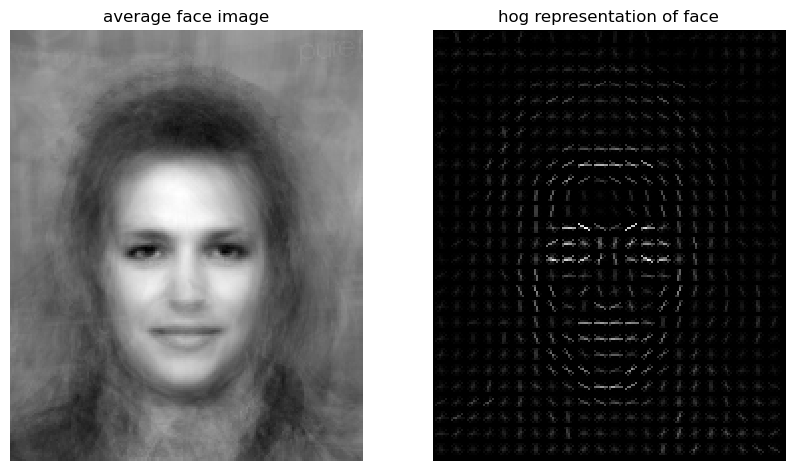

In [39]:
image_paths = fnmatch.filter(os.listdir('./face'), '*.jpg')
list.sort(image_paths)
n = len(image_paths)
face_shape, avg_face = load_faces(image_paths, n)

(face_feature, face_hog) = hog_feature(avg_face)

plot_part1(avg_face, face_hog)

# Part 2: Sliding Window
Implement **`sliding_window`** function to have windows slide across an image with a specific window size. The window slides through the image and check if an object is detected with a high score at every location. These scores will generate a response map and you will be able to find the location of the window with the highest hog score. 


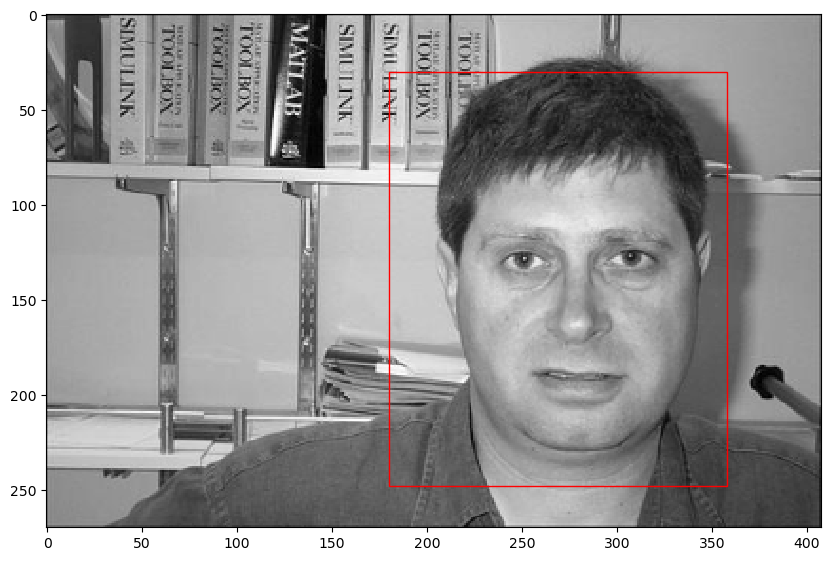

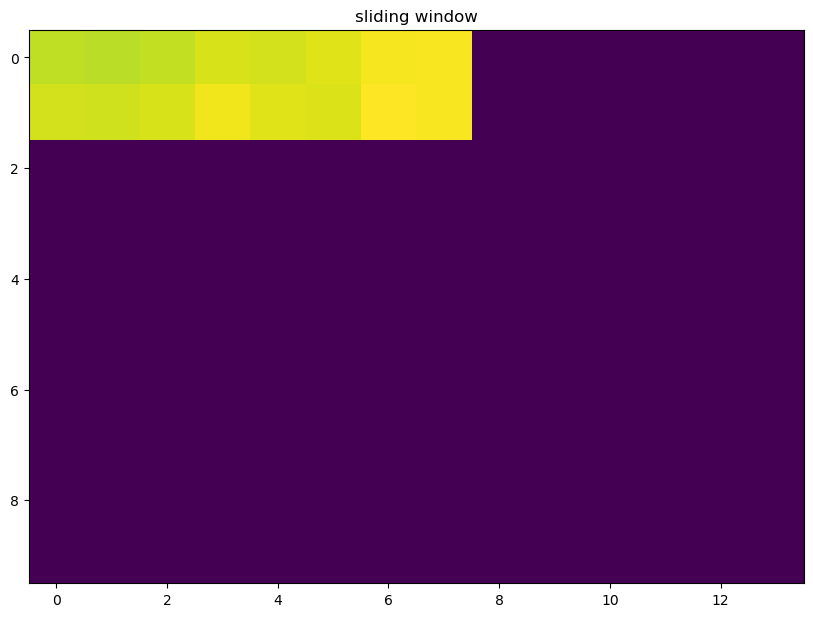

In [41]:
image_path = 'image_0001.jpg'

image = io.imread(image_path, as_gray=True)
image = rescale(image, 0.8)

(hogFeature, hogImage) = hog_feature(image)

(winH, winW) = face_shape
(score, r, c, response_map) = sliding_window(image, face_feature, stepSize=30, windowSize=face_shape)
crop = image[r:r+winH, c:c+winW]

plot_part2(image, r, c, response_map, winW, winH)

Sliding window should successfully found the human face in the above example. However, in the cell below, we are only changing the scale of the image, and you can see that sliding window does not work once the scale of the image is changed. 

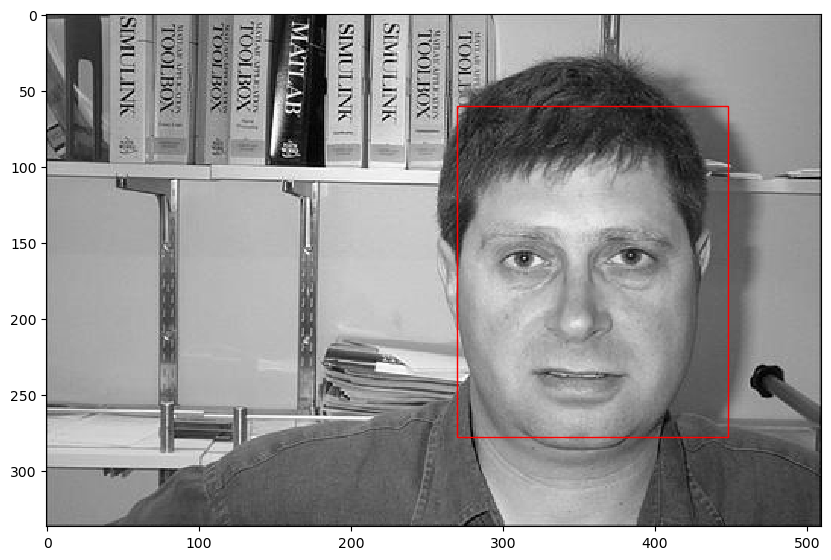

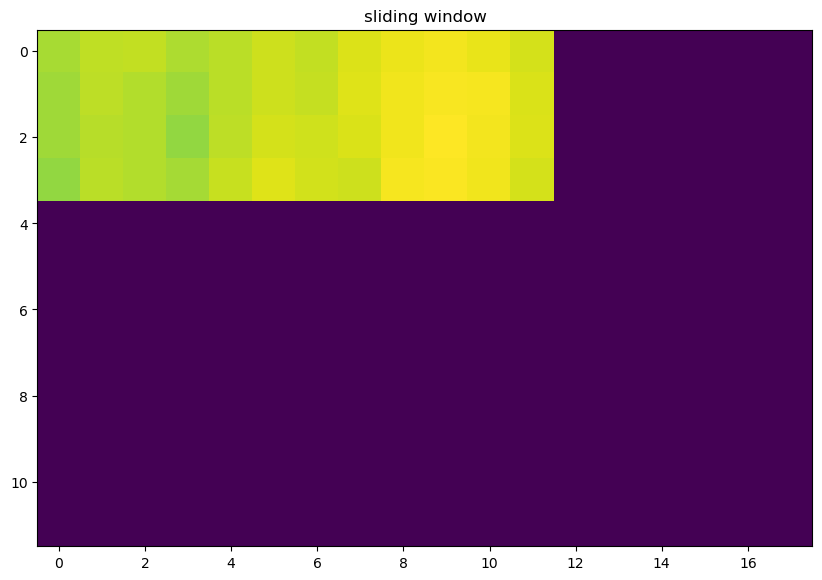

In [42]:
image_path = 'image_0001.jpg'
image = io.imread(image_path, as_gray=True)
image = rescale(image, 1.0)

(winH, winW) = face_shape
(score, r, c, max_response_map) = sliding_window(image, face_feature, stepSize=30, windowSize=face_shape)

crop = image[r:r+winH, c:c+winW]

plot_part2(image, r, c, max_response_map, winW, winH)

# Part 3: Image Pyramids
In order to make sliding window work for different scales of images, you need to implement image pyramids where you resize the image to different scales and run the sliding window method on each resized image. This way you scale the objects and can detect both small and large objects. 


###  3.1 Image Pyramid

Implement **`pyramid`** function in `detection.py`, this will create pyramid of images at different scales. Run the following code, and you will see the shape of the original image gets smaller until it reaches a minimum size.


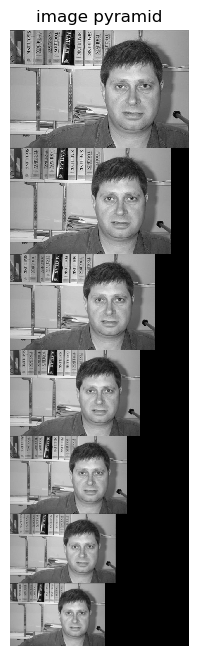

In [43]:
image_path = 'image_0001.jpg'

image = io.imread(image_path, as_gray=True)
image = rescale(image, 1.2)

images = pyramid(image, scale = 0.9)

plot_part3_1(images)

###  3.2 Pyramid Score

After getting the image pyramid, we will run sliding window on all the images to find a place that gets the highest score. Implement **`pyramid_score`** function in `detection.py`. It will return the highest score and its related information in the image pyramids.

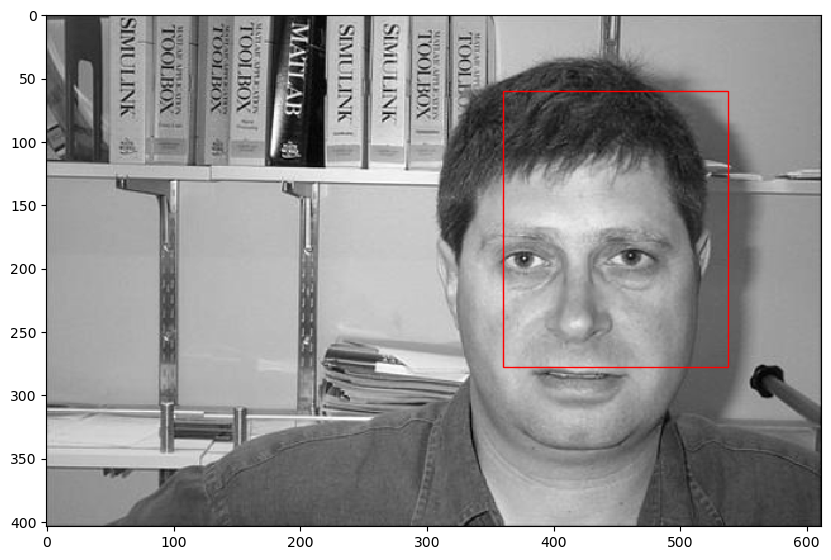

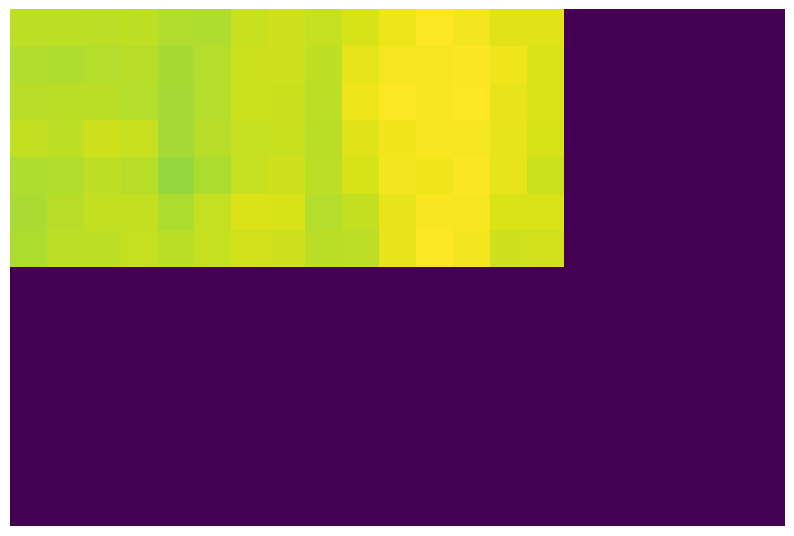

In [44]:
image_path = 'image_0001.jpg'

image = io.imread(image_path, as_gray=True)
image = rescale(image, 1.2)

(winH, winW) = face_shape
max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
        (image, face_feature, face_shape, stepSize = 30, scale=0.8)

plot_part3_2(image, max_scale, winW, winH, maxc, maxr, max_response_map)

From the above example, we can see that image pyramid has fixed the problem of scaling. Let's try another example below.

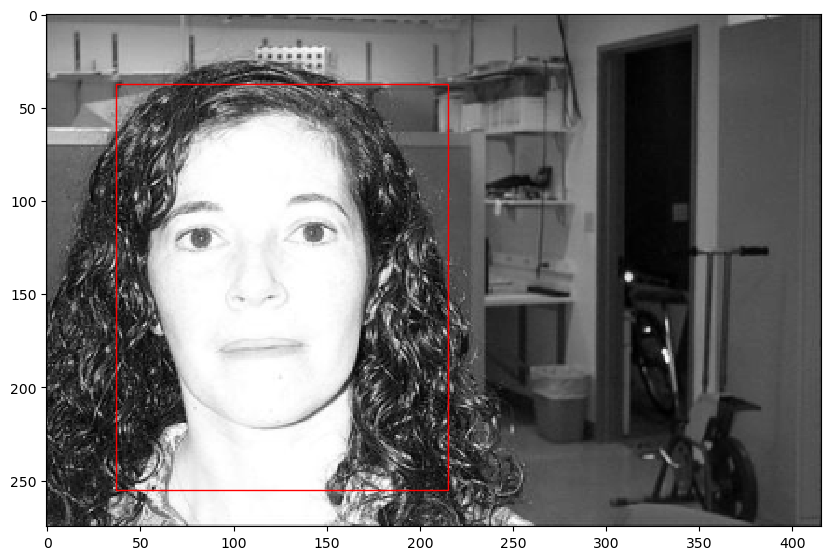

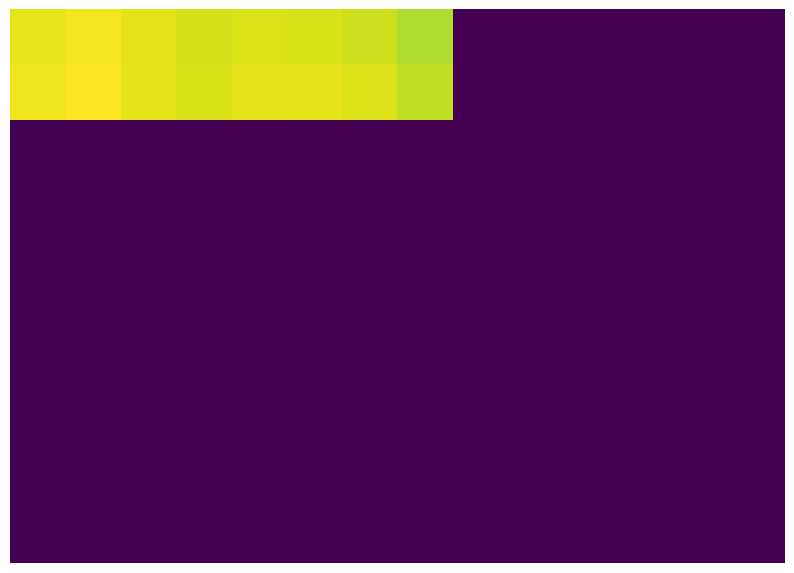

In [45]:
image_path = 'image_0338.jpg'
image = io.imread(image_path, as_gray=True)
image = rescale(image, 1.0)

(winH, winW) = face_shape

max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
    (image, face_feature, face_shape, stepSize = 30, scale=0.8)

plot_part3_2(image, max_scale, winW, winH, maxc, maxr, max_response_map)

###  3.3 Try face detector on your own photo

Upload a photo or selfie of your own face as `myphoto.jpg`. Test the face detector on it.

Note that the computing would take longer time if your photo resolution is high.

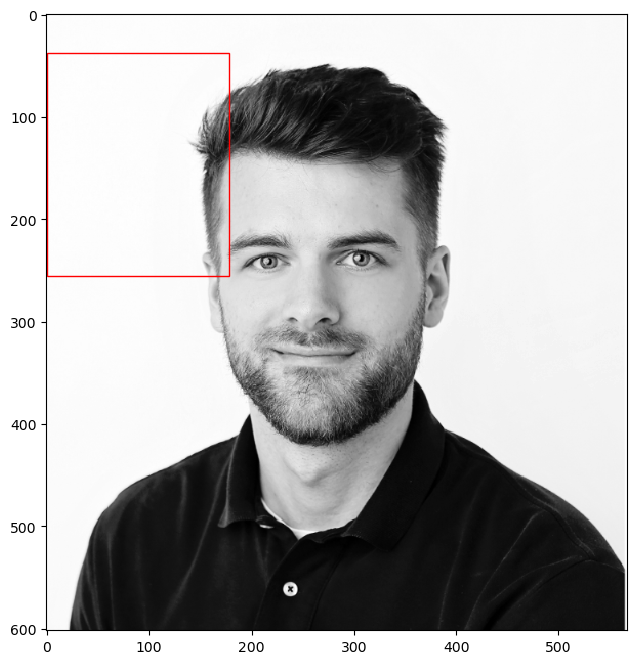

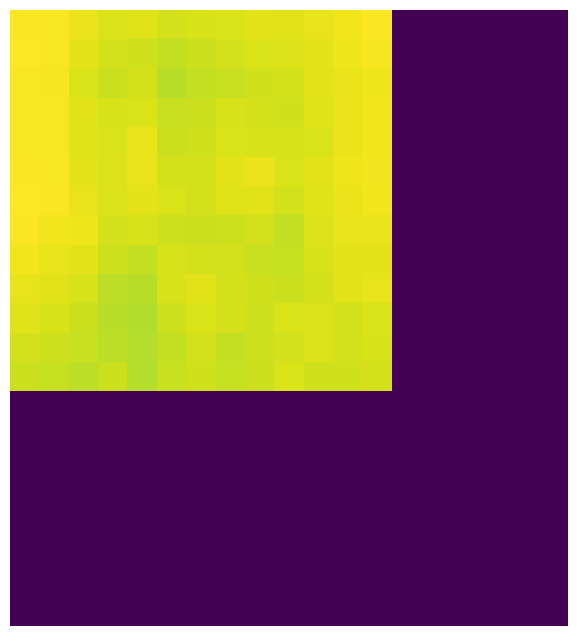

In [46]:
image_path = 'myphoto.png'
image = io.imread(image_path, as_gray=True)
image = rescale(image, 1.0)

(winH, winW) = face_shape

max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
    (image, face_feature, face_shape, stepSize = 30, scale=0.8)

plot_part3_2(image, max_scale, winW, winH, maxc, maxr, max_response_map)

In [47]:
HUH?!?!


SyntaxError: invalid syntax (2396816640.py, line 1)